In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Convert .txt file to .csv
# Load the .txt file (pipe-delimited)
txt_file_path = 'C:\\Users\\Toshiba\\Documents\\Kifiya\\week 3\\Data\\MachineLearningRating_v3.txt'
df_cleaned = pd.read_csv(txt_file_path, delimiter='|')

# Save the DataFrame to a CSV file
csv_file_path = 'C:\\Users\\Toshiba\\Documents\\Kifiya\\week 3\\Data\\converted_data.csv'
df_cleaned.to_csv(csv_file_path, index=False)
print(f"Data successfully converted from .txt to {csv_file_path}")

# Load the newly created CSV file for further analysis
df_cleaned = pd.read_csv(csv_file_path)


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\4183801868.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(txt_file_path, delimiter='|')


Data successfully converted from .txt to C:\Users\Toshiba\Documents\Kifiya\week 3\Data\converted_data.csv


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\4183801868.py:12: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [4]:
display(df_cleaned.head())

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
display(df_cleaned.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [9]:

    # 1. Handle missing values
    # Filling missing values for numerical columns with their mean
    df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

    # Optionally, you could also fill missing categorical values with mode (most frequent value)
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)

    # 2. Convert data types
    # Convert TransactionMonth to datetime format
    df_cleaned['TransactionMonth'] = pd.to_datetime(df_cleaned['TransactionMonth'], errors='coerce')

    # 3. Remove duplicates
    df_cleaned = df_cleaned.drop_duplicates()

    # 4. Handle outliers using IQR (Optional)
    numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

    # Remove outliers only from numerical columns
    Q1 = df_cleaned[numerical_columns].quantile(0.25)
    Q3 = df_cleaned[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned[~((df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3060235351.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)



Descriptive Statistics:



,TotalPremium,TotalClaims,CalculatedPremiumPerTerm,SumInsured
count,206467.000000,206467.0,206467.000000,206467.000000
mean,2.313907,0.0,6.546729,5326.576126
std,2.533801,0.0,5.610555,2362.786319
min,-7.014035,0.0,0.796000,0.010000
25%,0.000000,0.0,3.062200,3500.000000
50%,1.661140,0.0,5.360200,5000.000000
75%,4.532807,0.0,7.203900,7500.000000
max,12.531328,0.0,45.000000,10000.000000



Data Structure:



UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

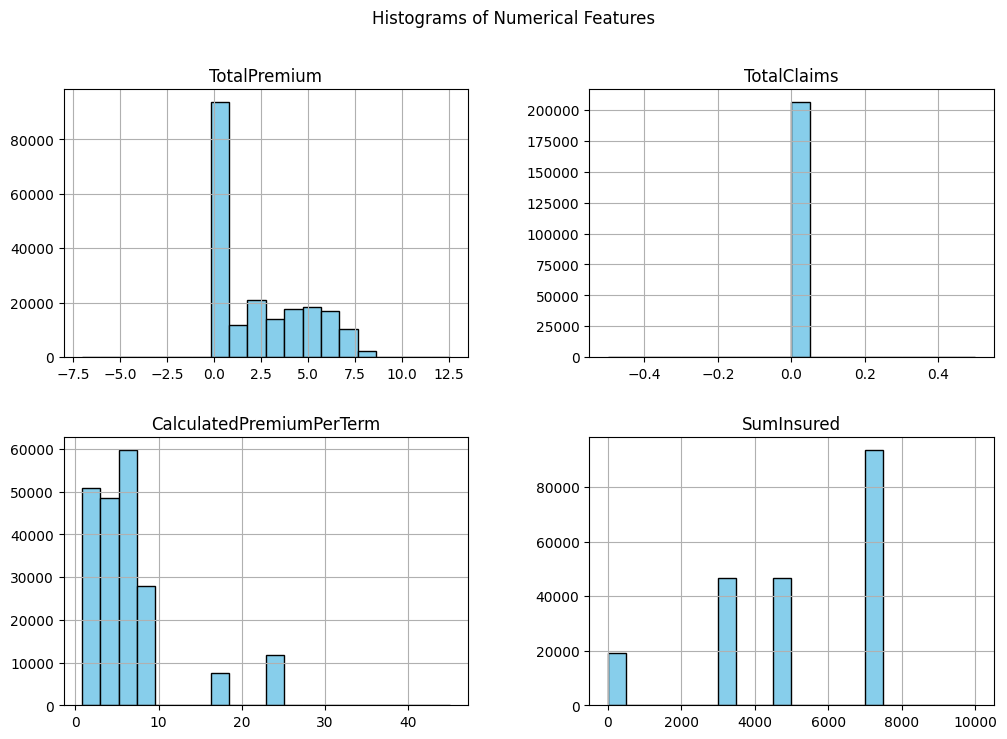

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2', ax=axes[i])
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2', ax=axes[i])
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2', ax=axes[i])
C:\Users\Toshiba\AppData\Local\Temp\ipyk

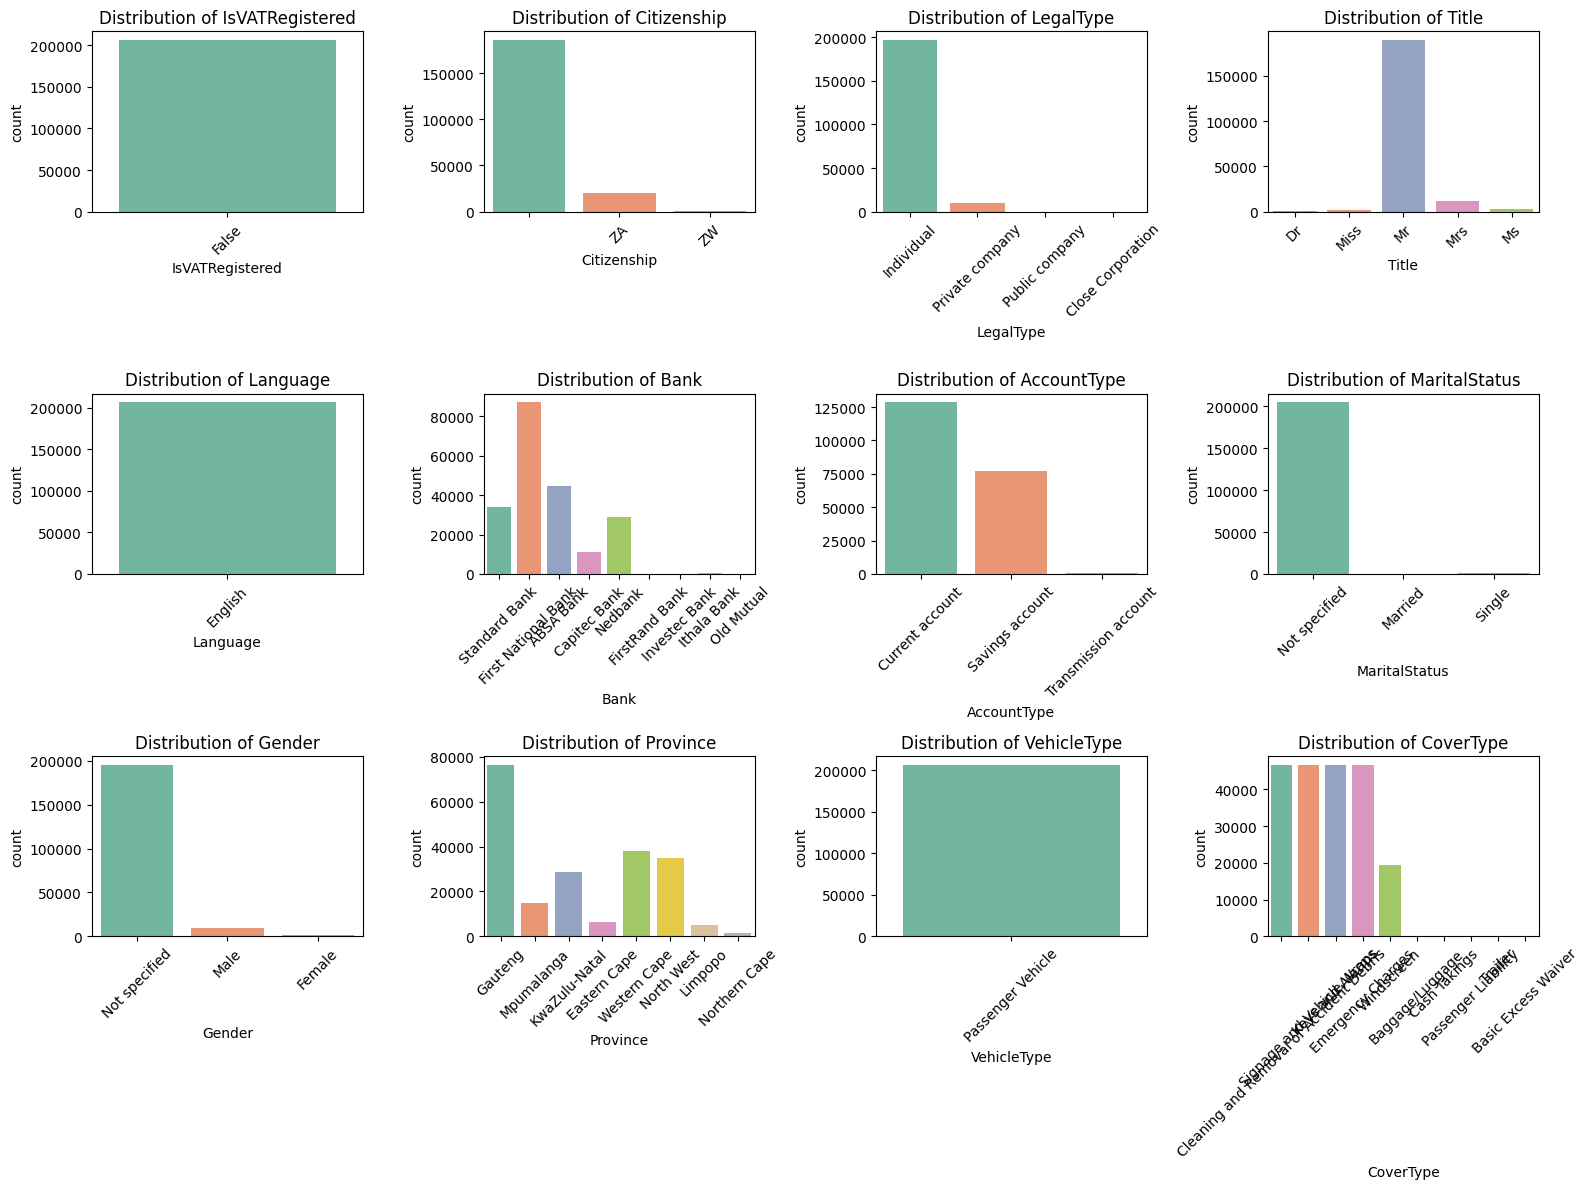

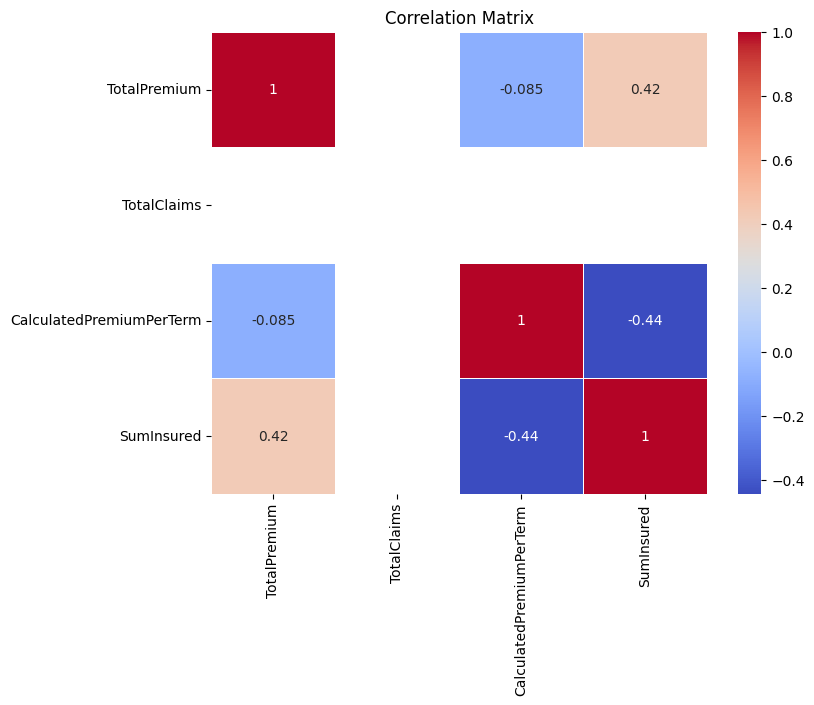

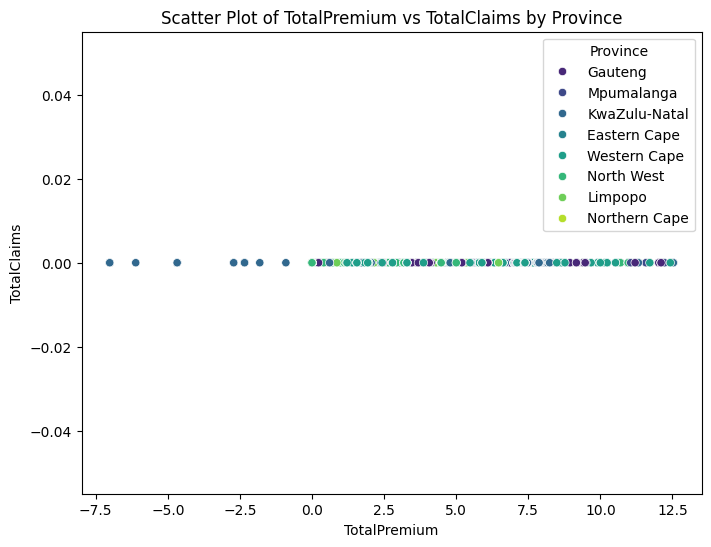


Trends Over Geography (Province):



,CoverType,CalculatedPremiumPerTerm
Province,,
Eastern Cape,Keys and Alarms,25.0
Gauteng,Cleaning and Removal of Accident Debris,25.0
KwaZulu-Natal,Cleaning and Removal of Accident Debris,25.0
Limpopo,Emergency Charges,25.0
Mpumalanga,Cleaning and Removal of Accident Debris,18.0
North West,Signage and Vehicle Wraps,18.0
Northern Cape,Signage and Vehicle Wraps,25.0
Western Cape,Cleaning and Removal of Accident Debris,25.0


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned[col], palette='Set3')
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned[col], palette='Set3')
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned[col], palette='Set3')
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:70: FutureWarning: 

Passing `pa

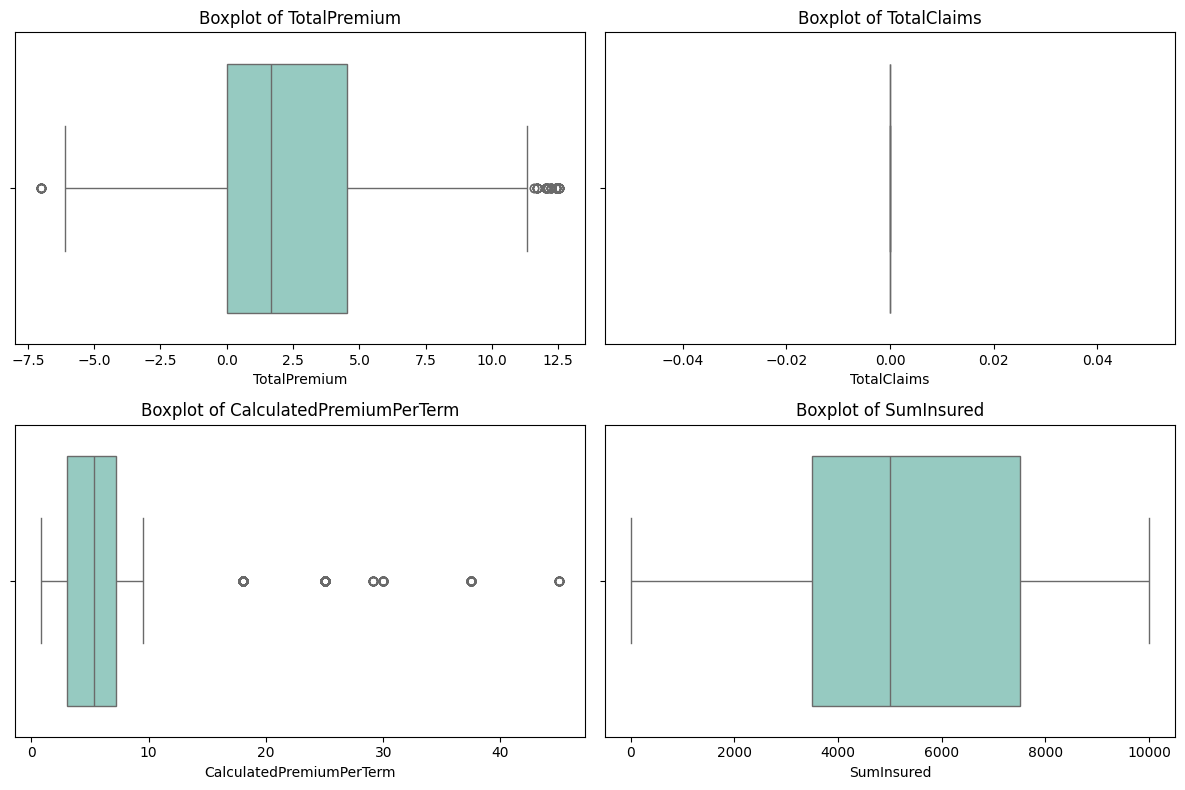

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='VehicleType', y='TotalPremium', data=df_cleaned, palette='husl')


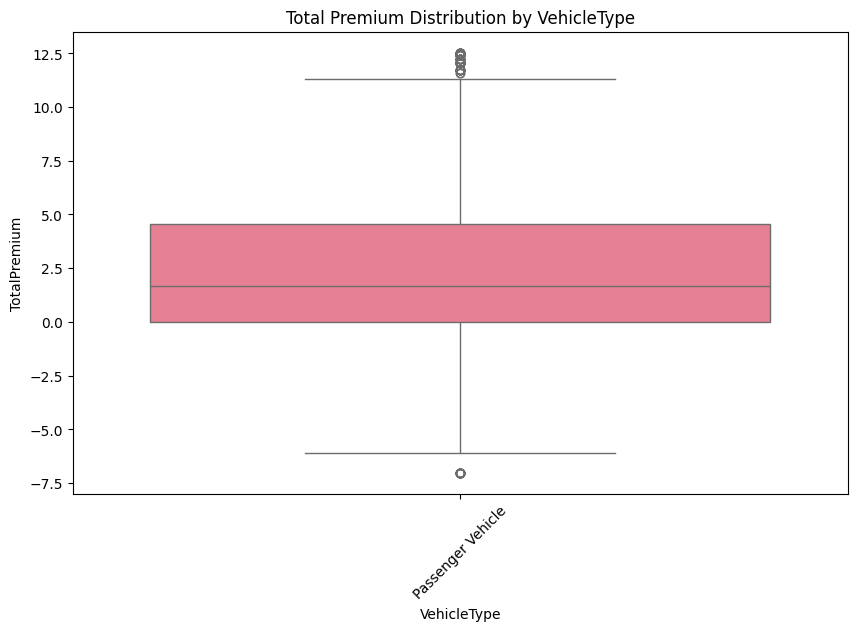

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoverType', y='TotalClaims', data=df_cleaned, palette='muted')


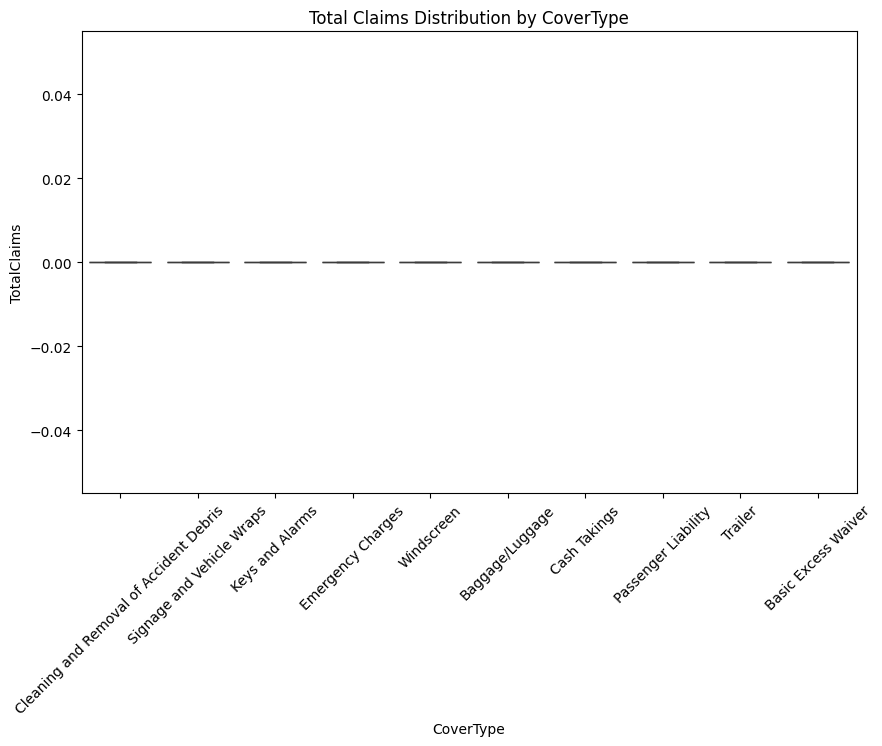

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\3727333021.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VehicleType', y='CalculatedPremiumPerTerm', data=df_cleaned, palette='coolwarm')


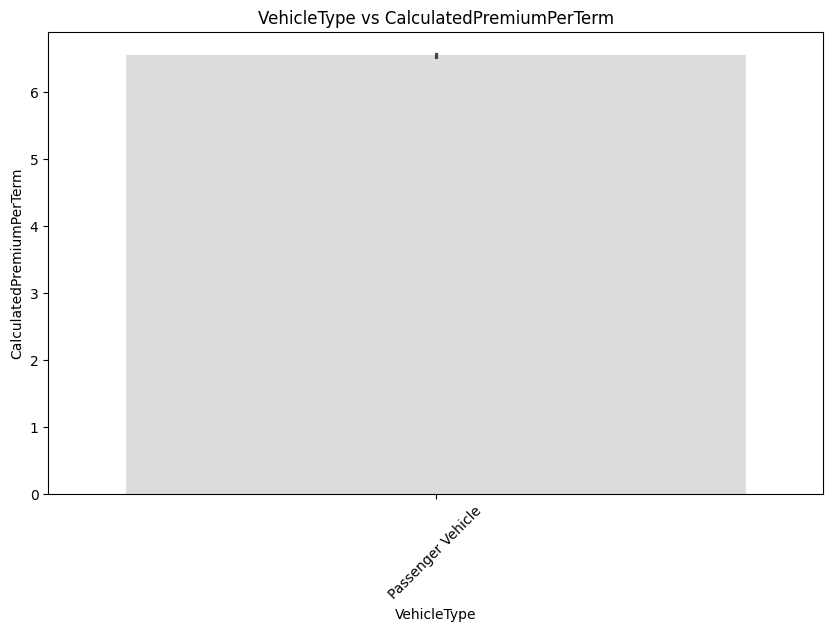

In [11]:
# 1. Data Summarization
## Descriptive Statistics
print("\nDescriptive Statistics:\n")
display(df_cleaned[['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured']].describe())

# 2. Data Structure (check data types)
print("\nData Structure:\n")
display(df_cleaned.dtypes)


# 4. Univariate Analysis
## Distribution of Numerical Variables
numerical_cols = ['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured']
df_cleaned[numerical_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Distribution of Categorical Variables

# List of categorical columns
categorical_cols = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 
                    'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Province', 
                    'VehicleType', 'CoverType']

# Set up the grid size for subplots (3 rows, 4 columns)
n_rows = 3
n_cols = 4

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))  # Adjust the figure size

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable in its respective subplot
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_cleaned, x=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the layout to make space for titles and labels
plt.tight_layout()
plt.show()

# 5. Bivariate or Multivariate Analysis
## Correlation Matrix for Numerical Columns
correlation_matrix = df_cleaned[['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Scatter Plot for TotalPremium vs TotalClaims
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df_cleaned, hue='Province', palette='viridis')
plt.title('Scatter Plot of TotalPremium vs TotalClaims by Province')
plt.show()

# 6. Data Comparison: Trends Over Geography
## Group by Province and analyze trends in CoverType and CalculatedPremiumPerTerm
grouped_data = df_cleaned.groupby('Province')[['CoverType', 'CalculatedPremiumPerTerm']].agg(lambda x: x.value_counts().index[0])
print("\nTrends Over Geography (Province):\n")
display(grouped_data)

# 7. Outlier Detection
## Box Plots for Numerical Features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df_cleaned[col], palette='Set3')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 8. Visualization: Creative and Beautiful Plots
## Plot 1: Total Premium by VehicleType
plt.figure(figsize=(10, 6))
sns.boxplot(x='VehicleType', y='TotalPremium', data=df_cleaned, palette='husl')
plt.xticks(rotation=45)
plt.title('Total Premium Distribution by VehicleType')
plt.show()

## Plot 2: Total Claims Distribution by CoverType
plt.figure(figsize=(10, 6))
sns.boxplot(x='CoverType', y='TotalClaims', data=df_cleaned, palette='muted')
plt.xticks(rotation=45)
plt.title('Total Claims Distribution by CoverType')
plt.show()

## Plot 3: VehicleType vs CalculatedPremiumPerTerm
plt.figure(figsize=(10, 6))
sns.barplot(x='VehicleType', y='CalculatedPremiumPerTerm', data=df_cleaned, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('VehicleType vs CalculatedPremiumPerTerm')
plt.show()